In [ ]:
import tensorflow as tf
import tarfile
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#**Data Augmentation**

In [ ]:
#importing drive to load files
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading data from drive and storing the data in numpy arrays

file = tarfile.open('/content/drive/MyDrive/DLS data/cifar-10-python.tar.gz')
file.extractall('/content') 
file.close()

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

data_dict = {}
data_combi = []
labels_combi = []
for i in range(1,6):
  data_dict['data_batch_'+str(i)] = unpickle('/content/cifar-10-batches-py/data_batch_'+str(i))
  data_combi.append(data_dict['data_batch_'+str(i)][b'data'])
  labels_combi.append(data_dict['data_batch_'+str(i)][b'labels'])

data_combi = np.array(data_combi)
labels_combi = np.array(labels_combi)

del data_dict

In [ ]:
!rm -rf 'cifar-10-batches-py' 

In [ ]:
from google.colab import drive

drive.flush_and_unmount()

In [ ]:
data_combi = data_combi.reshape(-1,50000,3072)[0]
labels_combi = labels_combi.reshape(-1,50000, )[0]

data_combi = data_combi.astype('float32')
print(data_combi.shape)
print(labels_combi.shape)

(50000, 3072)
(50000,)


In [ ]:
#training and validation data 

data_combi_train, data_combi_val, labels_combi_train, labels_combi_val = train_test_split(data_combi,labels_combi,random_state = 1,test_size = 0.1)

print(data_combi_train.shape)
print(data_combi_val.shape)
print(labels_combi_train.shape)
print(labels_combi_val.shape)

(45000, 3072)
(5000, 3072)
(45000,)
(5000,)


In [ ]:
#Reshaping the data into 32 * 32 * 3

data_combi_train_reshaped = data_combi_train.reshape(45000,3,32,32).transpose(0,2,3,1)
data_combi_val_reshaped = data_combi_val.reshape(5000,3,32,32).transpose(0,2,3,1)

In [ ]:
#rescale the pixels to [-1, 1]

data_combi_train_rescaled_reshaped =  (data_combi_train_reshaped/255) - (data_combi_train_reshaped/255).mean()
data_combi_val_rescaled_reshaped =  (data_combi_val_reshaped/255) - (data_combi_val_reshaped/255).mean()

In [ ]:
#One hot encoding the labels

labels_combi_train = tf.one_hot(labels_combi_train,depth=10)
labels_combi_val = tf.one_hot(labels_combi_val,depth=10)

In [ ]:
#building the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(data_format='channels_last',filters = 10, kernel_size = (5,5), strides = 1, activation = 'relu', kernel_initializer = tf.keras.initializers.HeNormal()),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2),
    tf.keras.layers.Conv2D(data_format='channels_last',filters = 10, kernel_size = (5,5), strides = 1, activation = 'relu', kernel_initializer = tf.keras.initializers.HeNormal()),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=20,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal()),
    tf.keras.layers.Dense(units=10,activation='softmax')
  ])

In [ ]:
#modile compilation
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Training the model
history = model.fit(data_combi_train_rescaled_reshaped,labels_combi_train,batch_size=128,epochs=20,validation_data=(data_combi_val_rescaled_reshaped,labels_combi_val),verbose=True)

Epoch 1/20
352/352 [==============================] - 14s 9ms/step - loss: 1.8594 - accuracy: 0.3100 - val_loss: 1.5948 - val_accuracy: 0.4096
Epoch 2/20
352/352 [==============================] - 2s 7ms/step - loss: 1.5238 - accuracy: 0.4462 - val_loss: 1.4486 - val_accuracy: 0.4794
Epoch 3/20
352/352 [==============================] - 2s 5ms/step - loss: 1.4201 - accuracy: 0.4877 - val_loss: 1.4101 - val_accuracy: 0.4874
Epoch 4/20
352/352 [==============================] - 3s 8ms/step - loss: 1.3518 - accuracy: 0.5160 - val_loss: 1.3381 - val_accuracy: 0.5214
Epoch 5/20
352/352 [==============================] - 2s 5ms/step - loss: 1.3014 - accuracy: 0.5357 - val_loss: 1.2878 - val_accuracy: 0.5390
Epoch 6/20
352/352 [==============================] - 2s 5ms/step - loss: 1.2702 - accuracy: 0.5488 - val_loss: 1.2760 - val_accuracy: 0.5420
Epoch 7/20
352/352 [==============================] - 3s 7ms/step - loss: 1.2366 - accuracy: 0.5654 - val_loss: 1.2385 - val_accuracy: 0.5618
Epoch

Building another classifier using an augmented dataset.

In [ ]:
# Rescaling original data to [0,1]

data_combi_train_reshaped_rescaled01 = data_combi_train_reshaped/255

In [ ]:
#Data Augmentation : Brightening the images, Darkening the images, horizontally flipping the images, and the original data 

augmented_data = np.concatenate((np.minimum(1.1 * data_combi_train_reshaped_rescaled01, 1),(0.9 * data_combi_train_reshaped_rescaled01),np.array([np.fliplr(data_combi_train_reshaped_rescaled01[i]) for i in range(0,45000)]),data_combi_train_reshaped_rescaled01))

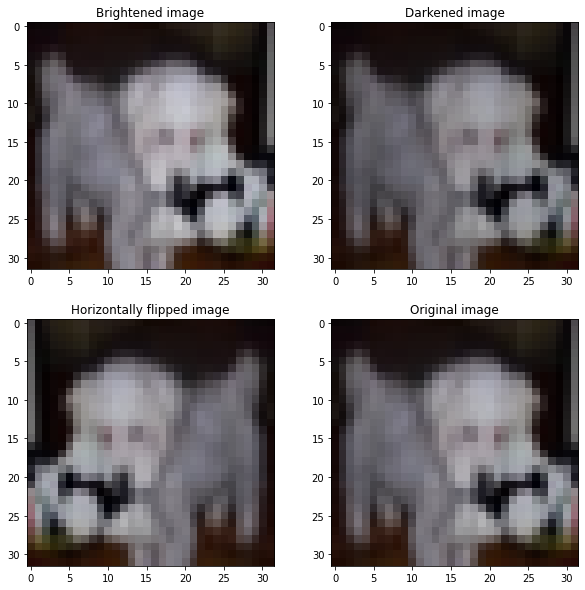

In [ ]:
#Visualizing a few images after augmentation
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(augmented_data[132])
plt.title('Brightened image')

plt.subplot(2,2,2)
plt.imshow(augmented_data[45000+132])
plt.title('Darkened image')

plt.subplot(2,2,3)
plt.imshow(augmented_data[45000*2+132])
plt.title('Horizontally flipped image')

plt.subplot(2,2,4)
plt.imshow(augmented_data[45000*3+132])
plt.title('Original image')

plt.show()

In [ ]:
#Rescaling teh data to [-1,1]

augmented_data_rescaled = augmented_data - augmented_data.mean()

In [ ]:
augmented_labels = np.concatenate((labels_combi_train,labels_combi_train,labels_combi_train,labels_combi_train))

In [ ]:
#Building the model

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(data_format='channels_last',filters = 10, kernel_size = (5,5), strides = 1, activation = 'relu', kernel_initializer = tf.keras.initializers.HeNormal()),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2),
    tf.keras.layers.Conv2D(data_format='channels_last',filters = 10, kernel_size = (5,5), strides = 1, activation = 'relu', kernel_initializer = tf.keras.initializers.HeNormal()),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=20,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal()),
    tf.keras.layers.Dense(units=10,activation='softmax')
  ])

In [ ]:
#model compilation

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Training the model with the augmented data set
history1 = model.fit(augmented_data_rescaled,augmented_labels,batch_size=512,epochs=20,validation_data=(data_combi_val_rescaled_reshaped,labels_combi_val),verbose=True)

Epoch 1/20
352/352 [==============================] - 5s 12ms/step - loss: 1.7370 - accuracy: 0.3687 - val_loss: 1.4509 - val_accuracy: 0.4686
Epoch 2/20
352/352 [==============================] - 3s 9ms/step - loss: 1.3680 - accuracy: 0.5102 - val_loss: 1.3353 - val_accuracy: 0.5226
Epoch 3/20
352/352 [==============================] - 3s 9ms/step - loss: 1.2822 - accuracy: 0.5461 - val_loss: 1.2809 - val_accuracy: 0.5446
Epoch 4/20
352/352 [==============================] - 3s 9ms/step - loss: 1.2298 - accuracy: 0.5661 - val_loss: 1.2242 - val_accuracy: 0.5720
Epoch 5/20
352/352 [==============================] - 3s 9ms/step - loss: 1.1844 - accuracy: 0.5836 - val_loss: 1.1919 - val_accuracy: 0.5796
Epoch 6/20
352/352 [==============================] - 3s 9ms/step - loss: 1.1520 - accuracy: 0.5957 - val_loss: 1.1554 - val_accuracy: 0.5912
Epoch 7/20
352/352 [==============================] - 3s 9ms/step - loss: 1.1244 - accuracy: 0.6070 - val_loss: 1.1373 - val_accuracy: 0.6022
Epoch

Plotting the validation accuracy curve for both the augmented dataset and the baseline model

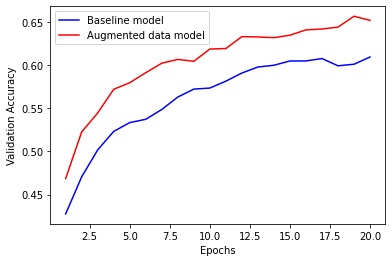

In [ ]:
plt.plot(range(1,21),history.history['val_accuracy'],color='blue')
plt.plot(range(1,21),history1.history['val_accuracy'],color='red')
plt.legend(['Baseline model','Augmented data model'])
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

We can see that the validation performance of data augmentation improves over the baseline model.